# Способы регуляризации и инициализации

Примеры к книге "Глубокое обучение. Погружение в мир нейронных сетей" (Николенко, Кадурин, Архангельская).  
Глава 4.  
В книге старая версия tf 1, потому примеры переписаны на keras (tf 2).  

In [ ]:
%load_ext tensorboard

In [1]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras.backend as K
from keras.layers import Input, Dense, Flatten, Reshape, Dropout
from keras.models import Model 
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Lambda
from keras.regularizers import L1L2

from tqdm.keras import TqdmCallback

from visualization.plot_graph import plot_digits, plot_digits_page
from data.get_data import get_mnist

d:\9-GitHubR\gh_mnist_experiments\mnist_experiments\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load MNIST
x_train, y_train, x_test, y_test = get_mnist()

# Инициализация

In [3]:
def create_model(init_weights:str = "uniform", activation:str = "tanh"):
    input_img = Input(shape=(28, 28, 1))
    flat_img = Flatten()(input_img)

    x = Dense(100, activation=activation, kernel_initializer=init_weights)(flat_img)
    x = Dense(100, activation=activation, kernel_initializer=init_weights)(x)
    x = Dense(100, activation=activation, kernel_initializer=init_weights)(x)
    x = Dense(100, activation=activation, kernel_initializer=init_weights)(x)
    x = Dense(10, activation="softmax")(x)
    model = Model(input_img, x, name = "model")

    return model

In [4]:
uniform_model = create_model(init_weights="uniform", activation = "tanh")
uniform_model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# uniform_model.summary()

# For tensorboard
log_dir = "logs/fit/01_init_uniform/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

uniform_model_results = uniform_model.fit(x_train, y_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, y_test),
                callbacks=[tensorboard_callback, TqdmCallback(verbose=1)],
                verbose=0,
)

100%|██████████| 50/50 [01:39<00:00,  1.98s/epoch, loss=0.175, accuracy=0.95, val_loss=0.185, val_accuracy=0.95]  


In [5]:
# Инициализация Ксавье (Glorot, Xavier)

glorot_model = create_model(init_weights="glorot_normal", activation = "tanh")
glorot_model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# glorot_model.summary()

# For tensorboard
log_dir = "logs/fit/01_init_glorot/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

glorot_model_results = glorot_model.fit(x_train, y_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, y_test),
                callbacks=[tensorboard_callback, TqdmCallback(verbose=1)],
                verbose=0,
)

100%|██████████| 50/50 [01:23<00:00,  1.68s/epoch, loss=0.127, accuracy=0.963, val_loss=0.138, val_accuracy=0.957]


In [6]:
uniform_relu_model = create_model(init_weights="uniform", activation="relu")
uniform_relu_model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# glorot_model.summary()

# For tensorboard
log_dir = "logs/fit/01_init_uniform_relu/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

xe_relu_model_results = uniform_relu_model.fit(x_train, y_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, y_test),
                callbacks=[tensorboard_callback, TqdmCallback(verbose=1)],
                verbose=0,
)

  0%|          | 0/50 [00:00<?, ?epoch/s]

100%|██████████| 50/50 [01:26<00:00,  1.72s/epoch, loss=0.171, accuracy=0.95, val_loss=0.201, val_accuracy=0.939] 


In [7]:
he_relu_model = create_model(init_weights="he_normal", activation="relu")
he_relu_model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# glorot_model.summary()

# For tensorboard
log_dir = "logs/fit/01_init_he_relu/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

he_relu_model_results = he_relu_model.fit(x_train, y_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, y_test),
                callbacks=[tensorboard_callback, TqdmCallback(verbose=1)],
                verbose=0,
)

100%|██████████| 50/50 [01:28<00:00,  1.78s/epoch, loss=0.0757, accuracy=0.979, val_loss=0.108, val_accuracy=0.967]


<AxesSubplot:xlabel='index', ylabel='val_accuracy'>

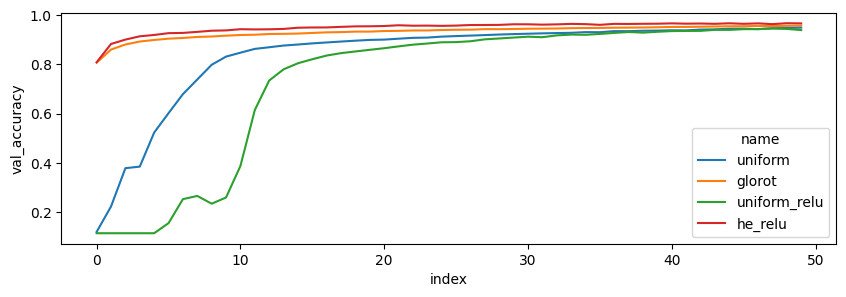

In [29]:
# что получилось в итоге (можно посмотреть и без tensorboard)
results_dict = {
    "uniform":uniform_model_results,
    "glorot":glorot_model_results,
    "uniform_relu":xe_relu_model_results,
    "he_relu":he_relu_model_results
}

rez_pdf = None
for name, rez in results_dict.items():
    tmp_pdf = pd.DataFrame(rez.history, index = rez.epoch)
    tmp_pdf["name"]=name

    if rez_pdf is None:
        rez_pdf=tmp_pdf.copy()
    else:
        rez_pdf = pd.concat([rez_pdf, tmp_pdf], axis=0)

fig, ax = plt.subplots(figsize=(10, 3))
sns.lineplot(data=rez_pdf.reset_index(drop=False), x="index", y="val_accuracy", hue="name", ax=ax)


Как описанно в книге, корректно выбранная оптимизация может получить большую точность в итоге и гораздо быстрее добраться до этой точности.
На графиках это и видно, специально подобранная инициализация весов дала с первых же эпох обучения более высокир скор на валидационных данных.

**В целом**:  
* для симметричных функций активаций с нулевым средним (tanh) - более верным будет выбрать инициализацию Глорот Ксавье
* для Relu и ему подобных - более верным будет выбрать инициализацию Хе (He - англ.)